In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import cPickle as pickle

import sys
sys.path.append('../..')
from utilities.utility import *

###experiment settings
network structure:
outputs = convolution(inputs, (3, 3), filter, (1, 1), (1, 1), self.activation)
outputs = convolution(outputs, (1, 1), filter)
outputs = convolution(outputs, (1, 1), filter)
outputs = layers.pooling(outputs, 'max', (2, 2), (2, 2))
outputs = convolution(outputs, (1, 1), filter)
outputs = convolution(outputs, (1, 1), filter)
outputs = layers.pooling(outputs, 'max', (2, 2), (2, 2))
outputs = convolution(outputs, (1, 1), filter)
outputs = convolution(outputs, (1, 1), filter)
outputs = convolution(outputs, (8, 8), 10, (8, 8))
outputs = layers.flatten(outputs)
outputs = layers.softmax(outputs)
optimizer_settings = {
   'lr'                : 0.05,
   'lr_decay_interval' : 1,
   'lr_decay_factor'   : 1.0,
   'optimizer'         : 'SGD',
   'weight_decay'      : 0
}
solver_configuration = {
   'batch_size'         : 128,
   'epoch'              : 60,
}
DReLU initialization: lower = 0; upper = 1

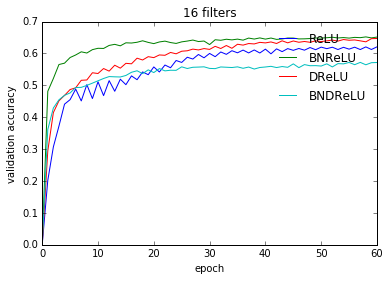

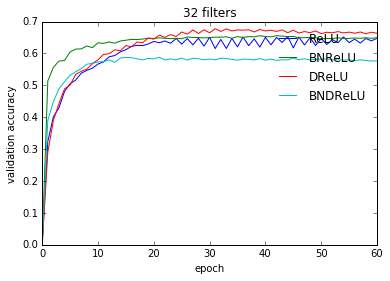

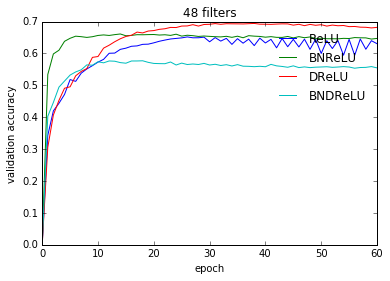

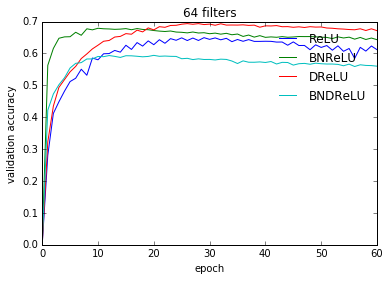

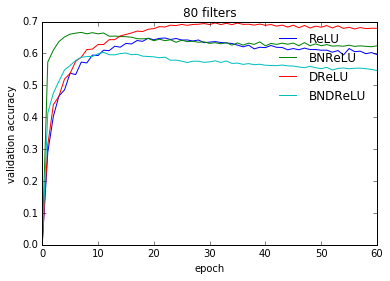

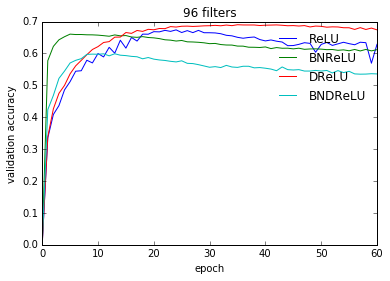

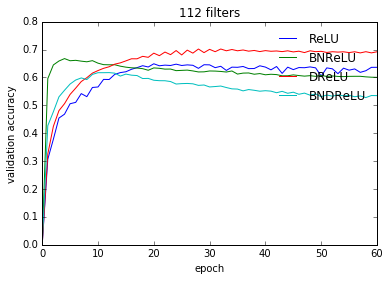

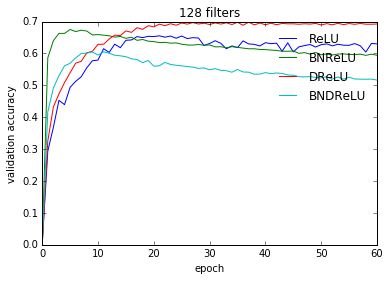

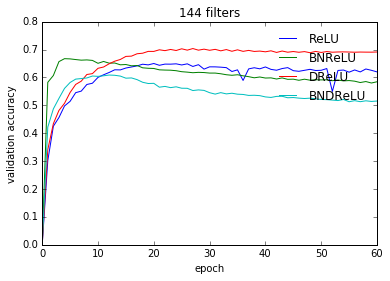

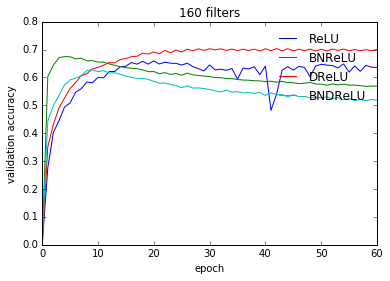

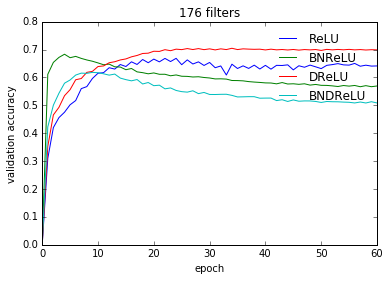

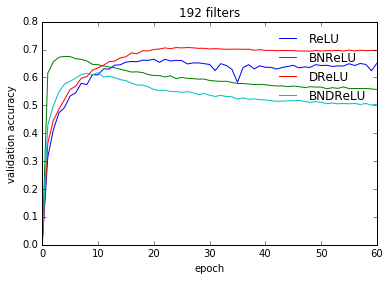

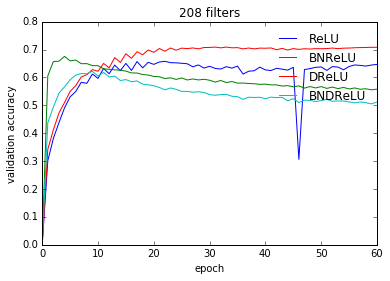

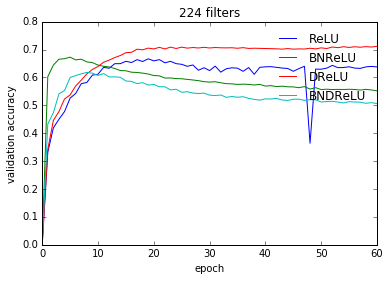

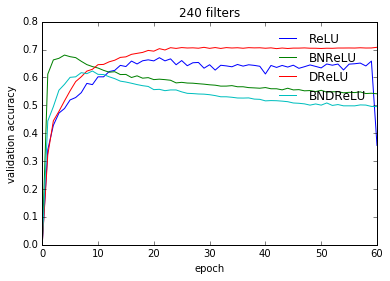

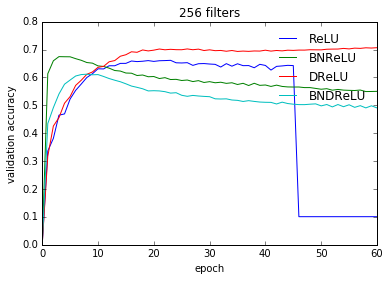

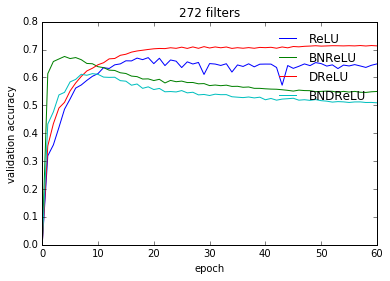

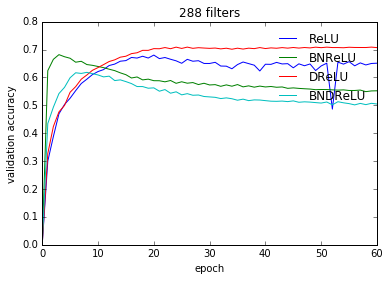

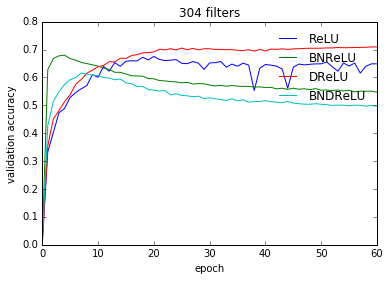

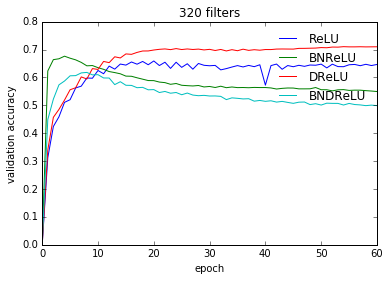

In [5]:
L = 16
U = 320
STEP = 16
activations = ('ReLU', 'BNReLU', 'DReLU', 'BNDReLU')
histories = {activation : [] for activation in activations}
for filter_count in range(L, U + 1, STEP):
    pl.figure()
    pl.title('%d filters' % filter_count)
    pl.xlabel('epoch')
    pl.ylabel('validation accuracy')
    for activation in activations:
        if activation == 'BNDReLU':
            label = 'pooled-CNN-%s-%d-filters-lr-0.050000' % (activation, filter_count)
        else:
            label = 'pooled-CNN-%s-%d-filters' % (activation, filter_count)
        history = pickle.load(open('../../models/%s-history' % label, 'rb'))
        if activation == 'BNDReLU':
            history = history[1]['validation_accuracy']
        histories[activation].append(history)
        pl.plot(range(len(history)), history, label=activation)
    pl.legend(framealpha=0)

In [ ]:
top_n = 5
pl.figure()
pl.xlabel('filters')
pl.ylabel('averaged top %d accuracy' % top_n)
for activation in activations:    
    pl.plot(
        range(L, U + 1, STEP),
        [averaged_top_n(history, top_n) for history in histories[activation]],
        label=activation
    )
pl.legend(framealpha=0)